# **Segmentación y Tracking de células madre usando la librería DeepCell**

### Trabajo realizado por **Elena Tomás Vela** y **Tadeo Cabrera Gómez**.

# Indice
- **1. Abstract**
- **2. Introduccion**
- **3. Seccion teórica**
  - 3.1 DeepCell
  - 3.2 Segmentación
    - 3.2.1. Introducción
    - 3.2.2. 
    - *3.2.3. C*
  - 3.3. Tracking
- **4. Seccion practica**
  - 4.1. Introduccion
  - 4.2. Segmentacion
    - *4.2.1. A*
    - *4.2.2. B*
    - *4.2.3. C*
  - 4.3. Tracking
- **5. Conclusiones**
- **6. Bibliografia**
- **7. Tabla de tiempos**

# **1. Abstract**
En este trabajo usaremos la librería [**DeepCell**](https://deepcell.readthedocs.io/en/master/index.html), basada en [**TensorFlow**](https://www.tensorflow.org), para poder realizar segmentación y tracking de células madre.

# **2. Introducción**

La visión por ordenador, también llamada visión informática o artificial es una rama de la ingeniería informática que trata métodos para adquirir, procesar, analizar y comprender imágenes con el fin de reproducir información numérica o simbólica de dichas imágenes que puedan ser tratados por un ordenador.

Uno de los usos de la visión por ordenador, y el que se desarrollará en este trabajo, es la segmentación y seguimiento (o tracking) de células en imágenes biomédicas. La segmentación celular consiste en identificar y delimitar cada célula dentro de una imagen, separándola del fondo, mientras que en el tracking TOOOOOOOOOOOOOOOOOOOOOODOOOOOOOOOOOOOOOOOOOOOOOO


# **3. Sección Teórica**

## DeepCell

## Segmentación

La segmentación de células en visión por ordenador es una técnica utilizada en procesamiento de imágenes biomédicas para identificar y aislar células individuales dentro de una imagen, con el fin de analizar su morfología, contar células o detectar anomalías.

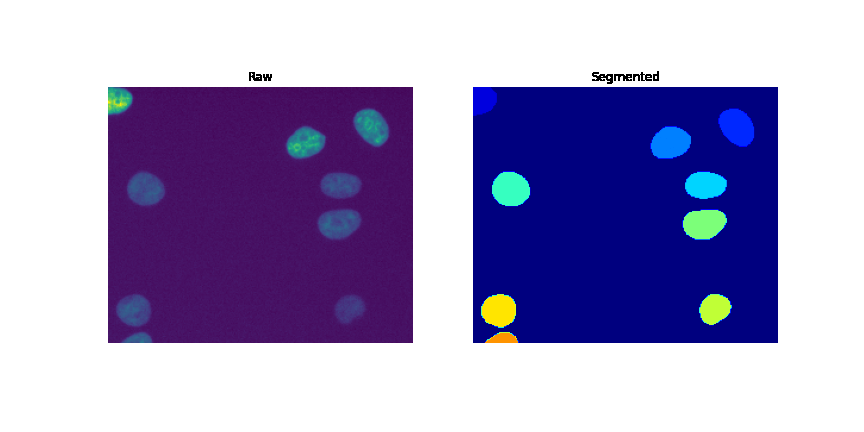

GIF del resultado de la segmentación [**obtenida en el repositorio de GitHub de DeepCell**](https://github.com/vanvalenlab/deepcell-tf/blob/f1839a4eac03df1ceb17f28390bb7a1aa3f8dac8/notebooks/applications/segmented.gif).


Existen varias técnicas para la segmentación de células, cada una con ventajas y desventajas dependiendo de la calidad de la imagen, el nivel de ruido y la superposición celular:

- **Segmentación basada en umbralización**: Se basa en establecer un umbral de intensidad para separar las células del fondo TODOOOO

- **Segmentación basada en clustering**: Algoritmos como *K-Means* agrupan píxeles con características similares como dimos en la segunda semana de la asignatura, sin embargo esta técnica puede ser menos precisa si hay solapamiento celular o variabilidad en la intensidad.

- **Segmentación basada en redes neuronales y Deep Learning**: Mediante el uso de **redes neuronales convolucionales** podemos realizar una segmentación precisa. Esta técnica requiere grandes cantidades de datos anotados y poder computacional, pero logra alta precisión.

DeepCell implementa esta última técnica. TOOOOOOOOOOODDDDDDDDDDDDDDOOOOOOOOOOOOOOOO.

Vamos a analizar los pasos a seguir para entrenar un modelo que pueda segmentar imágenes.

### Paso 1. Cargar datos

El primer paso para crear el modelo es obtener los datos para entrenar el modelo. Como vamos a usar aprendizaje supervisado, necesitamos una fuente de datos que para cada imagen tenga el resultado de la segmentación correcta. Los datos los podemos dividir en tres tipos:
- **Entrenamiento**: Datos usados para entrenar el modelo, aprendiendo los patrones de estos mediante técnicas como el descenso del gradiente.
- **Validación**: Datos usados para ajustar hiperparámetros y evaluar el rendimiento del modelo *durante* el entrenamiento.
- **Prueba**: Datos usados para evaluar el rendimiento final del modelo *tras* el entrenamiento. Se separana del conjunto de datos de validación para evitar sobreajuste.

La documentación de DeepCell cita [**una fuente para descargar datos**](https://datasets.deepcell.org/), por lo que he usado esos datos para entrenar el modelo.

### Paso 2. Preprocesado de datos

Una vez hemos cargado los datos, el siguiente paso para entrenar un modelo de Machine Learning es realizar un **preprocesado**, donde TTTTTTTOOOOOOOOOODDDDDDDDDOOOOOOOOOO

- **Normalización del histograma**: La normalización del histograma ajusta los valores de intensidad de los píxeles en las imágenes para mejorar el contraste y la uniformidad. Esto es importante porque las imágenes pueden provenir de diferentes microscopios o condiciones experimentales.

- **Creación de generadores de datos**: Los generadores de datos sob una herramienta que se usa para cargar y procesar datos en tiempo real durante el entrenamiento del modelo. En lugar de cargar todas las imágenes de una vez en la memoria, un generador de datos carga y transforma los datos en pequeños lotes cada vez que el modelo los necesita. Además, se aplican transformaciones aleatorias a las imágenes, como rotaciones, volteos, zoom y recortes, para que el modelo pueda aprender a reconocer los objetos en distintas condiciones.

En el código de demostración, la librería crea generadores de datos para el conjunto de datos de entrenamiento y validación, y aplica las siguientes transformaciones:
    - Transformaciones del generador de datos para entrenamiento:
        - Rotacion aleatoria, para mejorarla capacidad del modelo de reconocer células en diferentes orientaciones.
        - Zoom aleatorio para que el modelo aprenda a segmentar células de distintos tamaños.
        - Posible volteo de imagen horizontal y vertical para aumentar la variabilidad de los datos.
        - Recorte de la imagen para normalizar el tamaño de entrada del modelo.
    
    - Transformaciones del generador de datos para validación: En este caso, como queremos evaluar el rendimiento del modelo en datos reales, es decir, sin alteraciones artificiales, realizamos menos transformaciones.
        - a
        - Recorte de la imagen para normalizar el tamaño de entrada del modelo.

aa

- **Aplicación de transformaciones especializadas**: Este paso consiste en crear representaciones intermedias de las imágenes que ayudan al modelo a aprender mejor la segmentación. Es decir, no solo se le da la imagen y la máscara de segmentación, sino que se calculan mapas auxiliares que contienen información adicional sobre la estructura de los objetos. Esto se hace porque segmentar objetos pequeños y con bordes poco definidos es difícil. Al incluir estas transformaciones especializadas, el modelo puede aprender a diferenciar mejor los objetos y a delimitar sus fronteras con mayor precisión.

Las transformaciones (y los parámetros de estas) que se realizan son las siguientes:

    - *Inner distance*: Calcula la distancia de cada píxel al centro del objeto, es decir, calcula qué tan "profundo" está un pixel dentro de una célula.
        - *alpha y beta*: Ajustan la intensidad del mapa de distancias internas.
        - *erosion_width*: Define cuánto se "desgastan" los bordes en la transformación.
    - *Outer distance*: Calcula la distancia de cada píxel al borde del objeto para resaltar los bordes de las células.
        - *erosion_width*: Define cuánto se "desgastan" los bordes en la transformación.
    - *Mapa de Foreground/Background*: Crea un mapa binario donde los pixeles blancos representan las células y los píxeles negros el fondo.

- **Generación de datos con las transformaciones**: Por último, se crean los datos de entrenamiento y validación aplicando las transformaciones mencionadas, y se visualizan algunas imágenes de entrenamiento con sus transformaciones aplicadas.

Hiperparámetroooos

- **HIPERPARÁMETROS DE AUMENTO DE DATOS Y TRANSFORMACIONES:** Estos parámetros definen cómo se manipulan las imágenes antes de ingresarlas a la red.
    - **seed**: Semilla aleatoria para asegurar la reproducibilidad en las transformaciones de datos.
    - **min_objects**: Establece el mínimo número de objetos (células) requeridos en una imagen para ser considerada válida.
    - **zoom_min**: Define el factor mínimo de zoom aleatorio aplicado a las imágenes. Por ejemplo, si una imagen tiene 256x256 píxeles, se puede escalar hasta un 75% de su tamaño original.
    - **crop_size**: Define el tamaño de recorte de las imágenes de entrada.
    - **outer_erosion_width**: Determina la cantidad de erosión aplicada a los bordes exteriores de los objetos segmentados.
    - **inner_distance_alpha**: Parámetro que ajusta automáticamente la distancia interna de los objetos en la segmentación.
    - **inner_distance_beta**: Controla la escala de la distancia interna entre objetos. Un valor mayor enfatiza la distancia entre células en la segmentación.
    - **inner_erosion_width**: Define cuánto se erosionan los bordes internos de los objetos segmentados. 0 significa que no se aplica erosión interna.
      
- **HIPERPARÁMETROS DE POST PROCESADO:** Estos parámetros afectan cómo se refinan los resultados después de que el modelo hace una predicción.
    - **maxima_threshold**: Define el umbral para identificar máximos locales en el mapa de predicción.
    - **interior_threshold**: Umbral para definir qué partes de una célula se consideran su interior en la segmentación. Valores bajos permiten detectar células más pequeñas.
    - **exclude_border**: Determina si se excluyen los objetos en los bordes de la imagen durante la segmentación.
    - **small_objects_threshold**: Tamaño mínimo para considerar un objeto segmentado como válido (0 significa que no se eliminan objetos pequeños).
    - **min_distance**: Define la distancia mínima entre objetos detectados para considerarlos como separados.

### Paso 3. Creación del modelo

Una vez preprocesados los datos, el siguiente paso es la creación del modelo. Para crear el modelo, hay que configurar los hiperparámetros. La librería utiliza la arquitectura PanopticNet, que permite la segmentación de objetos en imágenes biomédicas. 


- **HIPERPARÁMETROS DE LA ARQUITECTURA DEL MODELO**
    - **backbone**: Define la red neuronal base para la extracción de características. La red usada es **EfficientNetV2-BL**, una red neural convolocional previamente entrenada de ImageNet, la cual es también una variante optimizada de [**EfficientNet**](https://arxiv.org/abs/1905.11946) que ofrece mejor rendimiento con menos cómputo.
    - **input_shape**: Tamaño de entrada, que en este caso corresponde a las dimensiones de la imagen. Como están en escala de grises solo tiene un canal.
    - **norm_method**: Método de normalización. La librería le asigna None, lo que significa que no se aplcia normalización, al menos en esa etapa.
    - **num_semantic_classes**: Número de clases en cada una de las cabezas semánticas.
        - Inner distance: 1 clase (segmentación por distancia interna).
        - Outer distance: 1 clase (segmentación por distancia externa).
        - Foreground/background: 2 clases (clasificació entre fondo y objeto).
    - **location**: Activa el uso de información de ubicación espacial en la red. Esto puede mejorar la segmentación al permitir que la red aprenda patrones espaciales.
    - **pyramid_levels**: Especifica los niveles de la Feature Pyramid Network (FPN).


Antes de avanzar, vamos a aclarar el concepto de  Feature Pyramid Network. Esta es una arquitectura de red neuronal convolucional que ayuda a detectar y segmentar objetos a diferentes escalas en una imagen, usando lo que se llama piramides de características. La idea es construir representaciones jerárquicas de la imagen a través de diferentes niveles de resolución.

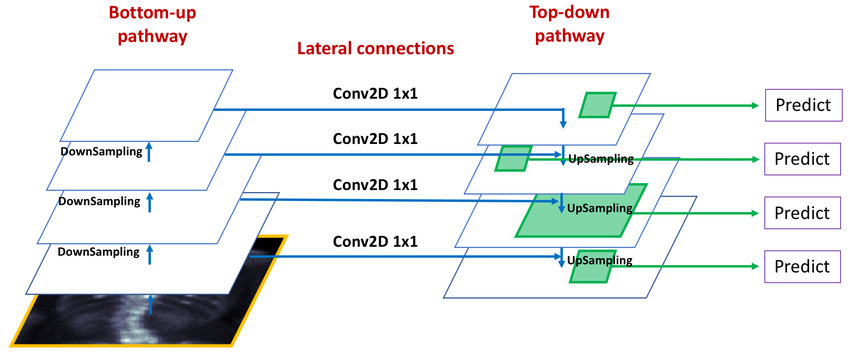

https://www.researchgate.net/figure/llustration-of-the-feature-pyramid-network-FPN-The-FPN-consists-of-a-bottom-up-pathway_fig1_339006612

- **HIPERPARÁMETROS DE ENTRENAMIENTO:** Estos parámetros controlan cómo se entrena la red neuronal.
    - **epochs**: Número de veces que la red ve el conjunto de datos completos durante el entrenamiento.
    - **batch_size**: Número de imágenes procesadas simultáneamente en cada paso de entrenamiento.
    - **lr**: Tasa de aprendizaje del optimizador, es decir, cuánto ajusta los pesos en cada iteración.

Definición de la función de pérdida.

Cada una de las cabezas semánticas del modelo además necesita una función de pérdida específica. Como inner-distance y outer-distice hacen regresión, se usa Mean Square Error, mientras que en foreground/backgroud, al realizarse clasificación, se usa weighted_categorical_crossentropy.

### Paso 4. Entrenamiento del modelo

Finalmente, una vez esta todo preparado, se entrena el modelo usando los datos generados previamente. 

### Paso 5. Evaluación del modelo

Una vez hemos creado el modelo, el último paso es comprobar su funcionamiento con el conjunto de datos de pruebas.

Antes de realizar predicciones con el modelo, se normalizan las imágenes de prueba utilizando la misma técnica aplicada durante el entrenamiento, garantizando que las dimensiones de los datos sean los mismos que los del entrenamiento.

Tabla de tiempos:
- Investigación de distintas propuestas de métodos de trabajo: 30 minutos
- Martes 25: 1 h 30 min
- Sección teórica

  - Abstract: 
  - Introducción: 
  - Segmentación: 

Bibliografia:
- [Cell Tracking Challenge](https://celltrackingchallenge.net/)

### Paso 1. Cargar datos

TODO

LUNES: 30 min (0.5/35)

MARTES: 1h 30min (2/35)

MIERCOLES: 12:30 ~ 17:30 (7/35)

JUEVES: 12:30 ~ 14:30 y 17:30 ~ 20:00 (11.5/35)

VIERNES: 

A continuación, vamos a entrenar un modelo para segmentar las imágenes. Para ello, me he basado en la [librería de DeepCell](https://deepcell.readthedocs.io/en/master/notebooks/Training-Segmentation.html), por lo que los pasos se realizarán alterando un poco el orden que se han mostrado en la sección de teoría.


# **CREACIÓN Y ENTRENAMIENTO DEL MODELO**

### Paso 0. Importar módulos y definir rutas

Vamos a comenzar importando todos los datos y definiendo las rutas donde cargaremos y guardaremos los archivos usados.

In [39]:
# Tiempo de ejecucion de celda: 20s

import os

import matplotlib.pyplot as plt
import numpy as np
from skimage.feature import peak_local_max
import tensorflow as tf

from deepcell.applications import NuclearSegmentation
from deepcell.image_generators import CroppingDataGenerator
from deepcell.losses import weighted_categorical_crossentropy
from deepcell.model_zoo.panopticnet import PanopticNet
from deepcell.utils.train_utils import count_gpus, rate_scheduler
from deepcell_toolbox.deep_watershed import deep_watershed
from deepcell_toolbox.metrics import Metrics
from deepcell_toolbox.processing import histogram_normalization

In [40]:
data_dir = '/data/'                 # Ruta de datos usados para crear el modelo
model_path = 'NuclearSegmentation' # Ruta donde se guardara el modelo
metrics_path = 'metrics.yaml'      # Ruta donde se guardaran las metricas
train_log = 'train_log.csv'        # Ruta donde se guardara el log de entrenamiento

### PASO 1. Cargar datos

Para entrenar el modelo he usado la base de datos **DynamicNuclearNet Segmentation**. El dataset pesa más de 2GB, por lo que no ha sido adjuntado, pero he adjuntado el enlace donde obtuve el dataset [**aquí**](https://datasets.deepcell.org/data).

In [ ]:
# Tiempo de ejecucion de celda: 40s

# Calculamos la ruta donde se encuentran los datos para entrenar el modelo
data_dir = os.path.join(os.getcwd(), "data")

# Datos de entrenamiento
with np.load(os.path.join(data_dir, 'train.npz')) as data:
    X_train = data['X']
    y_train = data['y']

# Datos de validacion
with np.load(os.path.join(data_dir, 'val.npz')) as data:
    X_val = data['X']
    y_val = data['y']

# Datos de prueba
with np.load(os.path.join(data_dir, 'test.npz')) as data:
    X_test = data['X']
    y_test = data['y']

### PASO 2. Definición de variables

A continuación vamos a definir todas las variables usadas para el preprocesado y entrenamiento.

In [41]:
# Tiempo de ejecucion de celda: 0s

# Arquitecura del modelo
backbone = "efficientnetv2bl" # Backbone de la red neuronal
location = True               # Si se incluye la localizacion en la red neuronal
pyramid_levels = ["P1","P2","P3","P4","P5","P6","P7"] # Niveles de la piramide

# Augmentacion de datos y preprocesamiento
seed = 0                      # Semilla
min_objects = 1               # Numero minimo de objetos
zoom_min = 0.75
crop_size = 128 #256
outer_erosion_width = 1
inner_distance_alpha = "auto" # Distancia interna
inner_distance_beta = 1
inner_erosion_width = 0

# Parametros de postprocesamiento
maxima_threshold = 0.1
interior_threshold = 0.01
exclude_border = False
small_objects_threshold = 0
min_distance = 10

# Parametros de entrenamiento
epochs = 3 # 16
batch_size = 8 # 16
lr = 1e-4

### PASO 3. Preprocesado de datos de prueba y validación

Ahora vamos a 

In [42]:
# Tiempo de ejecucion de celda: 3min 45s

# Preprocesado de los datos

# Normalizacion del histograma
X_train = histogram_normalization(X_train)
X_val = histogram_normalization(X_val)


# Parametros de transformacion
zoom_max = 1 / zoom_min

# Generador de datos para entrenamiento
datagen = CroppingDataGenerator(
    rotation_range=180,                 # Rotacion aleatoria
    zoom_range=(zoom_min, zoom_max),    # Zoom aleatorio
    horizontal_flip=True,               # Flip horizontal
    vertical_flip=True,                 # Flip vertical
    crop_size=(crop_size, crop_size),   # Tamanyo del recorte
)

# Generador de datos para validacion
datagen_val = CroppingDataGenerator(
    crop_size=(crop_size, crop_size)    # Tamanyo del recorte
)

MemoryError: Unable to allocate 4.83 GiB for an array with shape (4950, 512, 512, 1) and data type float32

Además de la aumentación estándar, se generan representaciones intermedias de las imágenes que ayudan a mejorar la segmentación.

 - **Inner-distance**: Calcula la distancia de cada píxel al centro de la célula.
 - **Outer-distance**: Calcula la distancia de cada píxel al borde de la célula.
 - **Foreground/Background (fgbg)**: Crea una máscara binaria indicando si un píxel pertenece a una célula o al fondo.

In [27]:
# Tiempo de ejecucion de celda: 1min 45s

# Transformaciones de las imagenes
transforms = ["inner-distance", "outer-distance", "fgbg"]

# Parametros de las transformaciones
transforms_kwargs = {

    # Transformacion outer-distance
    "outer-distance": {
        "erosion_width": outer_erosion_width, # Erosion de la distancia exterior
    },

    # Transformacion inner-distance
    "inner-distance": {
        "alpha": inner_distance_alpha,        # Alpha de la distancia interior
        "beta": inner_distance_beta,          # Beta de la distancia interior
        "erosion_width": inner_erosion_width, # Erosion de la distancia interior
    },
}


# Generador de datos para entrenamiento
train_data = datagen.flow(
    {'X': X_train, 'y': y_train},        # Datos
    seed=seed,                           # Semilla
    min_objects=min_objects,             # Numero minimo de objetos
    transforms=transforms,               # Lista de transformaciones
    transforms_kwargs=transforms_kwargs, # Parametros de las transformaciones
    batch_size=batch_size,               # Tamanyo del batch
)

print("Created training data generator.")

# Generador de datos para validacion
val_data = datagen_val.flow( 
    {'X': X_val, 'y': y_val},            # Datos
    seed=seed,                           # Semilla
    min_objects=min_objects,             # Numero minimo de objetos
    transforms=transforms,               # Lista de transformaciones
    transforms_kwargs=transforms_kwargs, # Parametros de las transformaciones
    batch_size=batch_size,               # Tamanyo del batch
)

print("Created validation data generator.")

Created training data generator.
Created validation data generator.


Ahora vamos a visualizar algunos resultados del preprocesado realizado.

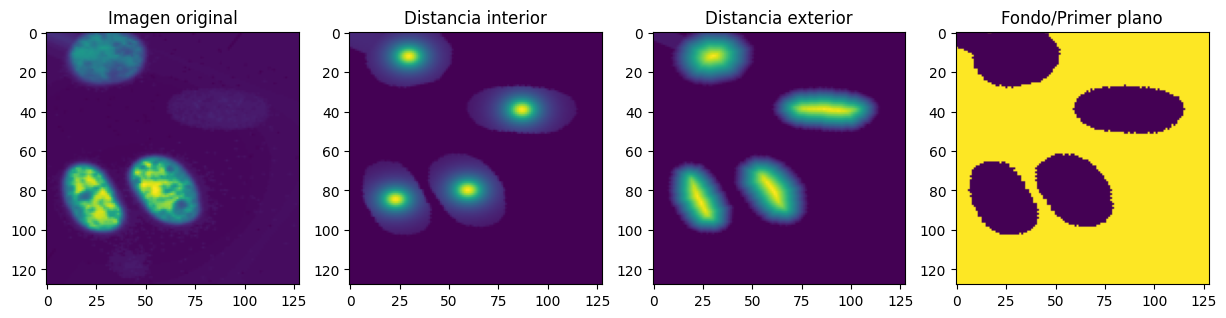

In [34]:
# Tiempo de ejecucion de celda: 4s

inputs, outputs = train_data.next() # Obtenemos los datos de entrenamiento

img = inputs[0]             # Imagen original
inner_distance = outputs[0] # Distancia interior
outer_distance = outputs[1] # Distancia exterior
fgbg = outputs[2]           # Fondo/Primer plano

# Creamos graficos
fig, axes = plt.subplots(1, 4, figsize=(15, 15))

axes[0].imshow(img[..., 0])
axes[0].set_title('Imagen original')

axes[1].imshow(inner_distance[0, ..., 0])
axes[1].set_title('Distancia interior')

axes[2].imshow(outer_distance[0, ..., 0])
axes[2].set_title('Distancia exterior')

axes[3].imshow(fgbg[0, ..., 0])
axes[3].set_title('Fondo/Primer plano')

plt.show() # Mostramos los graficos

### Paso 4. Construcción del modelo

In [35]:
# Tiempo de ejecucion de celda: 4min 15s

input_shape = (crop_size, crop_size, 1) # Tamanyo de la entrada

# Creacion del modelo
model = PanopticNet(
    backbone=backbone,              # Backbone
    input_shape=input_shape,        # Tamanyo de la entrada
    norm_method=None,               # Metodo de normalizacion
    num_semantic_classes=[1, 1, 2], # Numero de clases semanticas
    location=location,              # Localizacion
    include_top=True,               # Incluir capa de salida
    backbone_levels=["C1", "C2", "C3", "C4", "C5"], # Niveles del backbone
    pyramid_levels=pyramid_levels,  # Niveles de la piramide
)

In [36]:
# Tiempo de ejecucion de celda: 0s

def semantic_loss(n_classes):
    def _semantic_loss(y_pred, y_true):
        if n_classes > 1:
            return 0.01 * weighted_categorical_crossentropy(y_pred, y_true, n_classes=n_classes)
        return tf.keras.losses.MSE(y_pred, y_true)

    return _semantic_loss

loss = {}

# Give losses for all of the semantic heads
for layer in model.layers:
    if layer.name.startswith("semantic_"):
        n_classes = layer.output_shape[-1]
        loss[layer.name] = semantic_loss(n_classes)

optimizer = tf.keras.optimizers.Adam(lr=lr, clipnorm=0.001)

model.compile(loss=loss, optimizer=optimizer)

### Paso 5. Entrenamiento del modelo

Ahora vamos a entrenar el modelo. Cabe destacar que con los hiperparámetros sugeridos por la librería el entrenamiento dura más de 50 horas, por lo que he realizado los siguientes cambios para reducir el tiempo a dos:
- Reducido la cantidad de epochs de 16 a 2.
- Reducido el tamaño de batch de 16 a 8 para disminuir el consumo de memoria y acelerar los cálculos.
- Reducido el tamaño de la imagen a 128x128 píxeles.

Sin embargo, incluso tras esos ajustes no he sido capaz de entrenar el modelo, ya que empecé a obtener errores de memoria en mitad del entrenamiento y, tras varios intentos de horas de entrenamiento de modelos que siempre acabaron en errores, he decidido rendirme y descargar un modelo preentrenado como se recomienda en la asignatura.

In [38]:
with tempfile.TemporaryDirectory() as tmpdirname:
    weights_path = os.path.join(str(tmpdirname), "model_weights.h5")
    model.save_weights(weights_path, save_format="h5")
    prediction_model = PanopticNet(
        backbone=backbone,
        input_shape=input_shape,
        norm_method=None,
        num_semantic_heads=2,
        num_semantic_classes=[1, 1],  # inner distance, outer distance
        location=location,  # should always be true
        include_top=True,
        backbone_levels=["C1", "C2", "C3", "C4", "C5"],
        pyramid_levels=pyramid_levels,
    )
    prediction_model.load_weights(weights_path, by_name=True)

NameError: name 'tempfile' is not defined

### Paso 6. Evaluación del modelo

In [ ]:
X_test = histograph_normalization(X_test)

test_images = prediction_model.predict(X_test)

In [ ]:
index = np.random.choice(X_test.shape[0])
print(index)

fig, axes = plt.subplots(1, 4, figsize=(20, 20))

masks = deep_watershed(
    test_images,
    radius=radius,
    maxima_threshold=maxima_threshold,
    interior_threshold=interior_threshold,
    exclude_border=exclude_border,
    small_objects_threshold=small_objects_threshold,
    min_distance=min_distance
)

# calculated in the postprocessing above, but useful for visualizing
inner_distance = test_images[0]
outer_distance = test_images[1]

coords = peak_local_max(
    inner_distance[index],
    min_distance=min_distance
)

# raw image with centroid
axes[0].imshow(X_test[index, ..., 0])
axes[0].scatter(coords[..., 1], coords[..., 0],
                color='r', marker='.', s=10)

axes[1].imshow(inner_distance[index, ..., 0], cmap='jet')
axes[2].imshow(outer_distance[index, ..., 0], cmap='jet')
axes[3].imshow(masks[index, ...], cmap='jet')

plt.show()

Evaluamos

In [ ]:
outputs = model.predict(X_test)

y_pred = []

for i in range(outputs[0].shape[0]):

    mask = deep_watershed(
        [t[[i]] for t in outputs],
        radius=radius,
        maxima_threshold=maxima_threshold,
        interior_threshold=interior_threshold,
        exclude_border=exclude_border,
        small_objects_threshold=small_objects_threshold,
        min_distance=min_distance)

    y_pred.append(mask[0])

y_pred = np.stack(y_pred, axis=0)
y_pred = np.expand_dims(y_pred, axis=-1)
y_true = y_test.copy()

m = Metrics('DeepWatershed', seg=False)
m.calc_object_stats(y_true, y_pred)

# **APLICACIÓN DEL MODELO A LAS IMÁGENES DEL ESTUDIO**

TOOOOODOOOOOO   

Vamos a comenzar cargando los datos que queremos analizar. Tenemos que asegurarnos de 

In [ ]:
import tifffile
import numpy as np
import matplotlib.pyplot as plt

ruta_archivo = "MAX230426_bCatTracking_Exp91_20230426_73604 AM_f0000_t0000.tif"

imagenes = tifffile.imread(ruta_archivo)
print("Dimensiones del stack de imágenes:", imagenes.shape)

canal_verde = imagenes[:, :, :, 1]

print("Dimensiones del canal verde:", canal_verde.shape)

plt.imshow(canal_verde[0], cmap='gray')
plt.show()

ValueError: <COMPRESSION.LZW: 5> requires the 'imagecodecs' package